In [1]:
import numpy as np 
import matplotlib.pyplot as plt

from astropy.io import fits

from stack_fits import *

In [2]:
# matplotlib aesthetics
plt.rcParams.update({'axes.linewidth' : 1.5,
                     'ytick.major.width' : 1.5,
                     'ytick.minor.width' : 1.5,
                     'xtick.major.width' : 1.5,
                     'xtick.minor.width' : 1.5,
                     'xtick.labelsize': 12, 
                     'ytick.labelsize': 12,
                     'axes.labelsize': 18,
                     'axes.labelpad' : 5,
                     'axes.titlesize' : 22,
                     'axes.titlepad' : 10,
                     'font.family': 'Serif'
                    })

In [3]:
dir_crires_post = "/home/ktpha/chile-tellurics/post_date_obs/"

result = stack_all_spectra(dir_crires_post)

In [3]:
result = np.load("/home/ktpha/chile-tellurics/science_dict.npz")

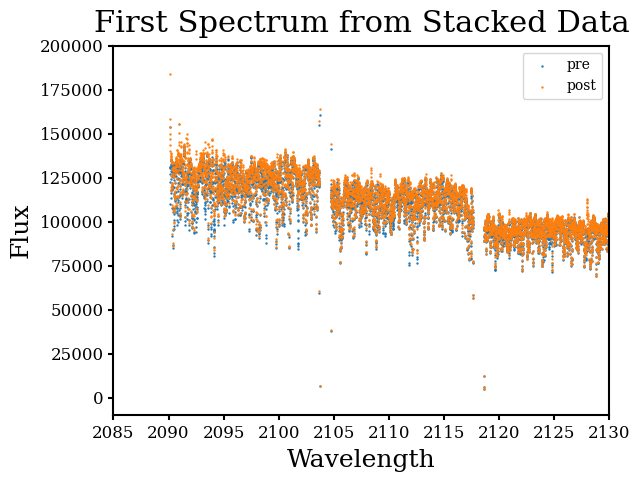

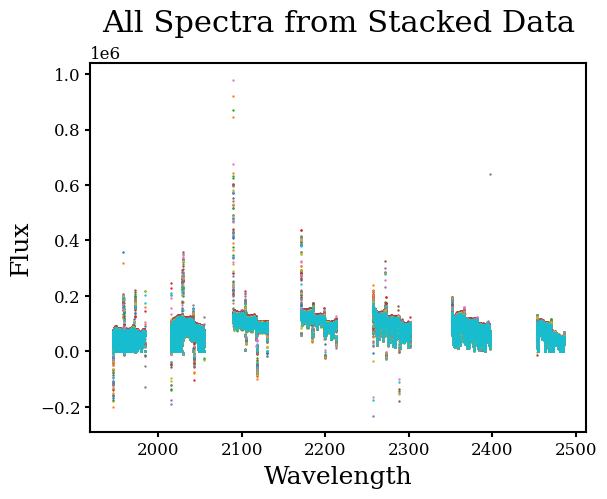

In [4]:
plt.scatter(result['wave'], result['orig_flux'][0], label="pre", s=0.5)
plt.scatter(result['wave'], result['flux'][0], label="post", s=0.5)

plt.ylim(-10000, 200000)
plt.xlim(2085, 2130)
plt.title("First Spectrum from Stacked Data")
plt.xlabel("Wavelength")
plt.ylabel("Flux")
plt.legend()
plt.show()

for i in range(result['flux'].shape[0]):
    plt.scatter(result['wave'], result['orig_flux'][i], label=f"Spectrum {i+1}", s=0.5)
plt.title("All Spectra from Stacked Data")
plt.xlabel("Wavelength")
plt.ylabel("Flux")
#plt.legend()
plt.show()


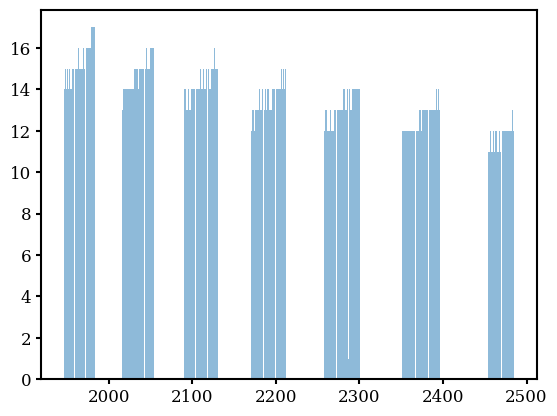

In [5]:
plt.hist(result['wave'], bins=6000, label="pre", alpha=0.5)
plt.show()

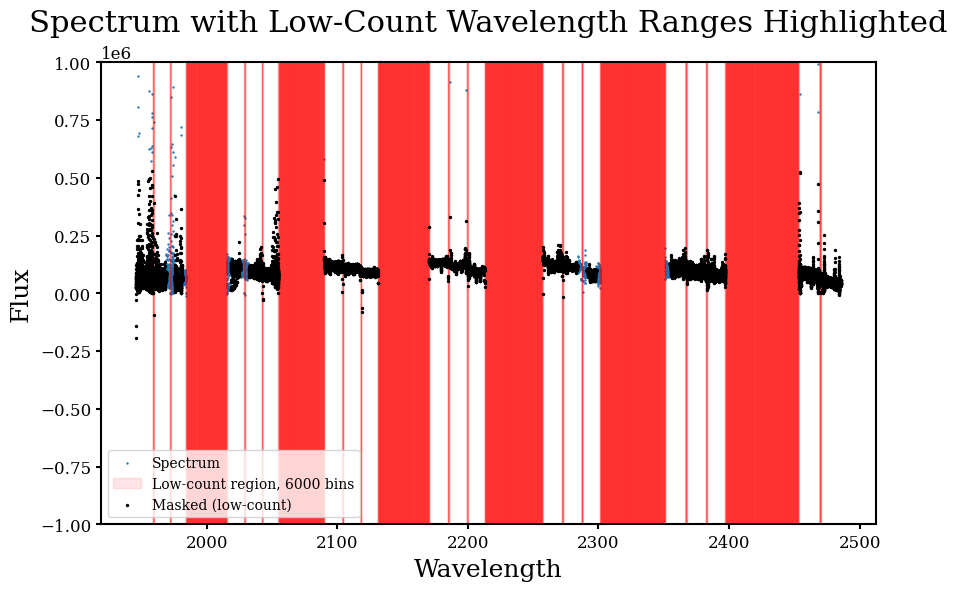

In [18]:
bins = 6000
limit = 5

# Calculate histogram
counts, bin_edges = np.histogram(result['wave'], bins=bins)

# Find bins with less than 5 points
low_count_bins = np.where(counts < limit)[0]

plt.figure(figsize=(10, 6))
plt.scatter(result['wave'], result['flux'][0], s=0.5, label="Spectrum")

# Highlight low-count regions
for i, idx in enumerate(low_count_bins):
    if i == 0:
        plt.axvspan(bin_edges[idx], bin_edges[idx+1], color='red', alpha=0.1, label=f'Low-count region, {bins} bins')
    else:
        plt.axvspan(bin_edges[idx], bin_edges[idx+1], color='red', alpha=0.1)

# Mask the spectrum: keep only points in low-count bins
mask = np.zeros_like(result['wave'], dtype=bool)
for idx in low_count_bins:
    mask |= (result['wave'] >= bin_edges[idx]) & (result['wave'] < bin_edges[idx+1])

expand = 500
window = np.ones(2 * expand + 1, dtype=int)
expanded_mask = np.convolve(mask.astype(int), window, mode='same') > 0

# Add points outside of 5 standard deviations
flux = result['flux'][0]
mean = np.mean(flux)
std = np.std(flux)
outlier_mask = (flux < mean - 0.75*std) | (flux > mean + 0.75*std)

# Combine masks
final_mask = expanded_mask | outlier_mask
good_mask = ~final_mask

plt.scatter(result['wave'][good_mask], result['flux'][0][good_mask], s=2, color='black', label="Masked (low-count)")

plt.title("Spectrum with Low-Count Wavelength Ranges Highlighted")
plt.xlabel("Wavelength")
plt.ylabel("Flux")
plt.ylim(-1e6, 1e6)
plt.legend()
plt.show()